### Star Cluster Luminosity Function

Here we look at two star clusters luminosity distribution. One is the young Trapezium cluster in Orion. The other is the Whiting 1 globular cluster which is young and moderately metal-rich.

**(a)** Plot the distributions of both clusters (using histograms).

**(b)** Make quantile plots comparing each of the cluster distribution to a normal distribution.

**(c)** Determine whether the distributions of clusters come from the same parent distribution using the K-S test.

**(d)** Determine whether the distributions follow a normal distribution.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import norm
from scipy.stats import ks_2samp

In [2]:
# load data
sc_trapezium = np.loadtxt("trapezium.dat")
sc_trapezium = sc_trapezium[sc_trapezium<50]
gc_whiting1 = np.loadtxt("whiting1.dat")
gc_whiting1 = gc_whiting1[gc_whiting1>0]

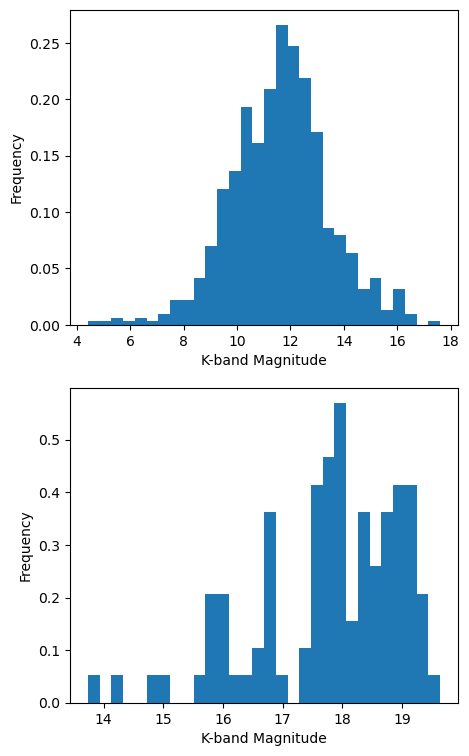

In [3]:
# let's plot the data
f, axarr = plt.subplots(2, figsize=[5,9])
for n,i in enumerate([sc_trapezium,gc_whiting1]):
    axarr[n].hist(i, bins=30, density=True)
    axarr[n].set_xlabel(r"K-band Magnitude")
    axarr[n].set_ylabel(r"Frequency")

**(b)** The quantile plots are very easy to do with $\verb|scipy.stats.probplot|$. The default is a normal distribution, so we don't need to specify this.

What does the plot tell us? The line shows us how the data should be ordered if the distributions were Gaussian. Since there's a very close agreement between the line and our actual points in blue, we can say that qualitatively the distributions can be described by a Gaussian.

Text(0, 0.5, 'Ordered Values')

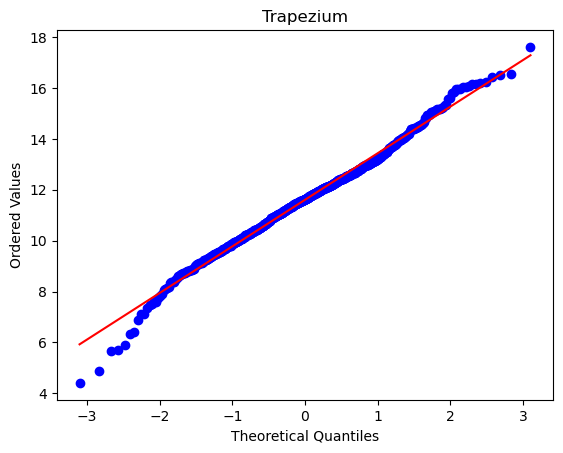

In [4]:
probplot(sc_trapezium, plot=plt)
plt.title("Trapezium")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")

Text(0, 0.5, 'Ordered Values')

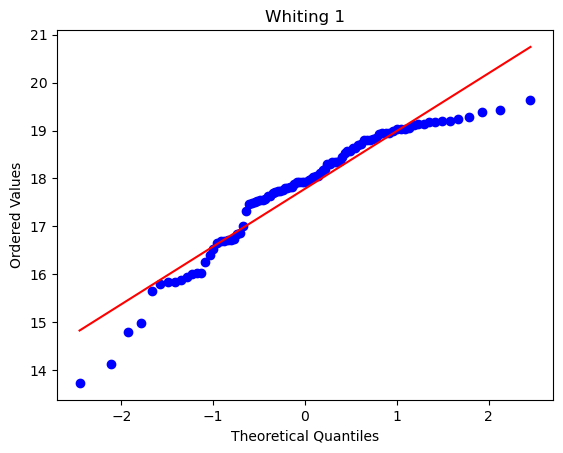

In [5]:
probplot(gc_whiting1, plot=plt)
plt.title("Whiting 1")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")

In [6]:
norm_tr = (sc_trapezium - np.mean(sc_trapezium)) / np.sqrt(np.var(sc_trapezium))
norm_wh = (gc_whiting1 - np.mean(gc_whiting1)) / np.sqrt(np.var(gc_whiting1))

**(c)** For this, we will use the $\verb|ks|$_$\verb|2samp|$ from scipy.stats

In [ ]:
plt.close()
D, p = ks_2samp(norm_tr,norm_wh)
print("D for the two-sided KS-test: %.2f" %(D))
print("p-value for a two-sided KS-test: %.2e" %(p))

**(d)** Compared to part **(b)**, we can determine more quantitatively how well the distributions agree with a Guassian. This can be done naively with a K-S test. For each distribution, we again. shift it by the mean of the distribution and divide by the variance of the distribution. Thus, if the distributions are Gaussian, they should now be distributed like Gaussian with $\mu = 0$ and $\sigma=1$.

In [ ]:
# Trapezium
stat, p = kstest(norm_tr, 'norm')
print("p-value for the Trapezium:",p)

# Whiting 1
stat, p = kstest(norm_wh, 'norm')
print("p-value for Whiting 1:",p)


In [ ]:
# Anderson-Darling test
stat, crit, p = anderson(norm_tr)
print("Trapezium",stat,crit,p)
stat, crit, p = anderson(norm_wh)
print("Whiting 1",stat,crit,p)

Based on this data it looks like both the cluster magnitude distributions that are not compatible with a Gaussian. However, we actually did a slight statistical error there. Have a look at https://asaip.psu.edu/Articles/beware-the-kolmogorov-smirnov-test. It describes common errors among astronomers when using the K-S test. You might realize that we are guilty of point 2. By subtracting the mean and dividing by the variance we have basically fit a Gaussian to the data set and then we compared the goodness-of-fit using a K-S test.

In [ ]:
# use bootstrap
from scipy.stats import bootstrap
rng = np.random.default_rng()

def adstat(d):
    norm_d = (d - np.mean(d)) / np.sqrt(np.var(d))
    stat, crit, p = anderson(norm_d)
    return stat

In [ ]:
data = (sc_trapezium,)  # samples must be in a sequence
res = bootstrap(data, adstat, confidence_level=0.9, random_state=rng)
print(res.confidence_interval)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')

In [ ]:
data = (gc_whiting1,)  # samples must be in a sequence
res = bootstrap(data, adstat, confidence_level=0.9, random_state=rng)
print(res.confidence_interval)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')

In [ ]:
# now do the same tests with the globular cluster data

gc_mw = np.loadtxt("glob_MW.dat") # absolute magnitude
gc_m31 = np.loadtxt("glob_M31.dat")-24.44 # absolute magnitude